Matplotlib is building the font cache; this may take a moment.


見つかった顔の数: 5


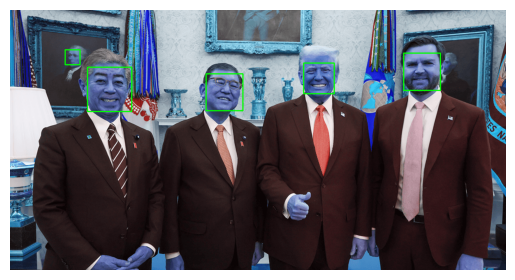

In [1]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

# 顔画像を読み込む
image = face_recognition.load_image_file("face.jpg")

# 顔の位置を検出
face_locations = face_recognition.face_locations(image)
print("見つかった顔の数:", len(face_locations))

# 顔の周囲に四角形を描画
for top, right, bottom, left in face_locations:
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

# OpenCVはBGRなのでRGBに変換して表示
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

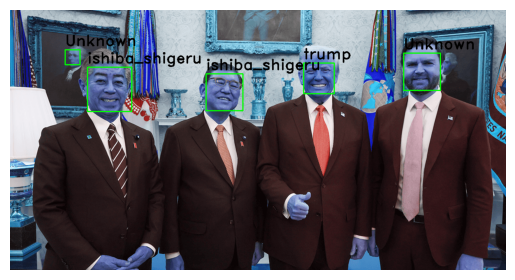

In [5]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import os

# known ディレクトリから登録顔情報を読み込む
known_face_encodings = []
known_face_names = []

known_dir = "known"
for filename in os.listdir(known_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        path = os.path.join(known_dir, filename)
        image = face_recognition.load_image_file(path)
        encoding = face_recognition.face_encodings(image)
        if encoding:  # 顔が検出された場合のみ
            known_face_encodings.append(encoding[0])
            name = os.path.splitext(filename)[0]  # ファイル名から拡張子を除去
            known_face_names.append(name)

# 認識対象画像を読み込む
target_image = face_recognition.load_image_file("face.jpg")
face_locations = face_recognition.face_locations(target_image)
face_encodings = face_recognition.face_encodings(target_image, face_locations)

# 顔に名前を付ける
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    if True in matches:
        match_index = matches.index(True)
        name = known_face_names[match_index]

    # 枠と名前を描画
    cv2.rectangle(target_image, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(
    target_image, 
    name, 
    (left, top - 10), 
    cv2.FONT_HERSHEY_DUPLEX,  # フォント種類（読みやすくて太め）
    1.2,                      # フォントサイズ（拡大）
    (0, 0, 0),                # 黒文字
    2                         # 線の太さ（太字風に）
)

# 表示
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

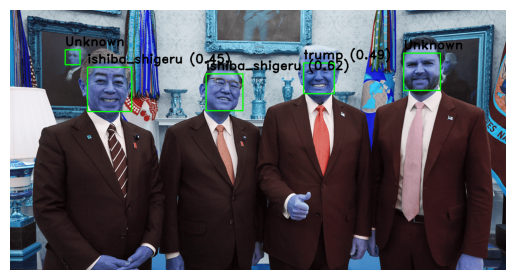

In [7]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import os

# known ディレクトリから登録顔情報を読み込む
known_face_encodings = []
known_face_names = []

known_dir = "known"
for filename in os.listdir(known_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        path = os.path.join(known_dir, filename)
        image = face_recognition.load_image_file(path)
        encoding = face_recognition.face_encodings(image)
        if encoding:  # 顔が検出された場合のみ
            known_face_encodings.append(encoding[0])
            name = os.path.splitext(filename)[0]  # ファイル名から拡張子を除去
            known_face_names.append(name)

# 認識対象画像を読み込む
target_image = face_recognition.load_image_file("face.jpg")
face_locations = face_recognition.face_locations(target_image)
face_encodings = face_recognition.face_encodings(target_image, face_locations)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = face_distances.argmin()
    confidence = 1 - face_distances[best_match_index]  # 1に近いほど一致

    name = "Unknown"
    if matches := face_recognition.compare_faces(known_face_encodings, face_encoding):
        if matches[best_match_index]:
            name = f"{known_face_names[best_match_index]} ({confidence:.2f})"

    # 枠と名前を描画
    cv2.rectangle(target_image, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(target_image, name, (left, top - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 0), 2)

# 表示
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()